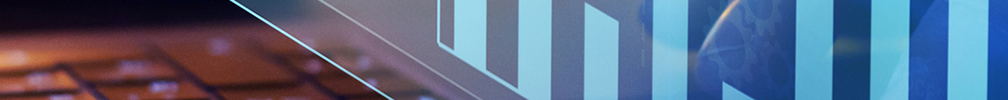

# Week 3 Overview
How can we ensure that a machine learning model trained on past data will perform well on new, unseen examples? Consider a model predicting housing prices: a model that’s too simple might overlook key factors, while one that’s overly complex could fit the noise in the data, failing to generalize to new examples. Neither scenario provides reliable insights for developers planning future projects. This tradeoff between simplicity and complexity lies at the heart of machine learning, and mastering it is crucial for building effective models.

Last week, we established a foundation in linear regression, exploring how to model relationships between variables using linear equations, polynomials, and hyperplanes. We introduced Mean Squared Error (MSE) as a performance measure and discussed methods like explicit formulae and gradient descent for optimization. We also saw how multiple and polynomial regression can extend linear models to capture more complex patterns.

This week, we’ll focus on evaluating machine learning models and understanding the concept of **generalization**—the ability of a model to apply what it has learned from the training data to new, unseen data. To achieve good generalization, we need to carefully balance underfitting and overfitting. We’ll start by examining the sources of errors and distinguishing between reducible and irreducible components. Then, we’ll introduce a statistical framework—the bias-variance tradeoff—which helps quantify the balance between overly simplistic models (high bias) and overly flexible models (high variance). 

By the end of the week, you'll gain a clearer understanding of how to navigate the underfitting/overfitting dilemma and, most importantly, how to evaluate and refine your models to ensure strong generalization to new data.

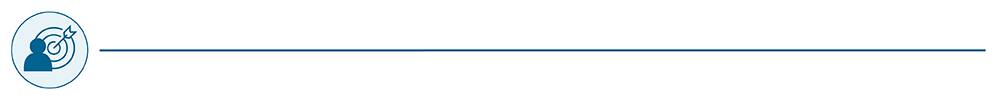

### Learning Objectives
By the end of this week, you should be able to:
- Analyze the notions of underfitting and overfitting and the problems with each
- Define the crucial concept of generalization
- Explain the bias-variance tradeoff and how it arises in ML models
- Discuss the importance of strategies for navigating the bias-variance tradeoff


# 3.1 Lesson: Generalization and the Sources of Errors

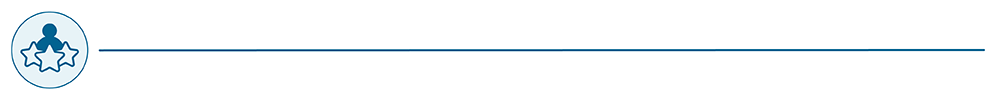

## Generalization and the Sources of Errors
Imagine you're building a model to predict next year’s sales for a retail company. It performs flawlessly on your historical data, but when applied to the new year's sales, the predictions are way off. It is practically useless! What went wrong? The issue lies in the model’s ability to **generalize** and perform well on unseen data. To address this, we first need to understand why predictions have errors and what steps we can reasonably take to minimize them.

### Sources of Prediction Error
Previously, we expressed the generic ML problem as approximating a function $f$ which identifies relationships between inputs $X$ and outputs $Y$ using the formula

$Y \quad = \quad f(X) + e$ , where $e$ is the error.

The error $e$ represents errors in the data. However, the model $\hat{f}$ is an approximation of $f$ which also introduces errors. It is important to keep these two types of errors distinct.

**Reducible error** is the component of error that can be minimized by improving the model. It occurs when the model does not adequately capture the underlying patterns in the data—often due to poor model selection, insufficient training, or incorrect parameter tuning. As you learned in Module 1, such a model is said to underfit.

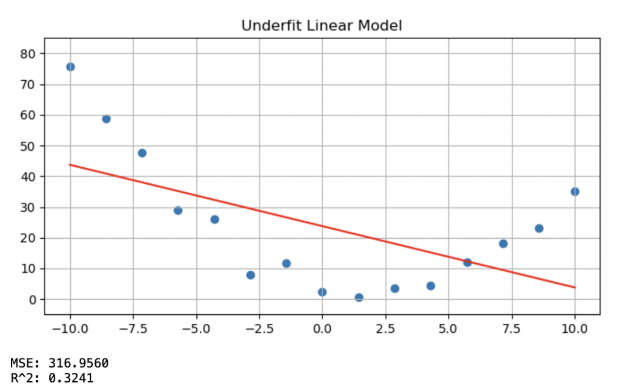

**Irreducible error** is an unavoidable source of errors in real datasets due to inherent noise or randomness in the data that is meaningless in our goal of finding the relationship between $X$ and $Y$. This can be caused by measurement errors, missing features, or simply unpredictable variations in the data.

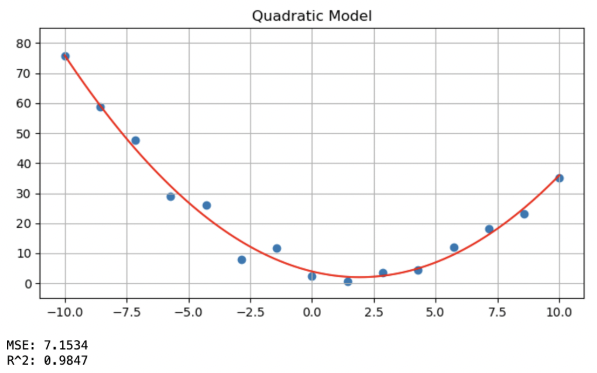

For instance, a housing-price dataset could have irreducible errors from factors like sudden economic shifts or unpredictable buyer behavior. Careful data collection protocols may minimize such errors, but they can not be completely eliminated. 

A good model of this dataset will uncover valuable patterns that can help real estate brokers make informed decisions and assist developers in predicting housing prices—and, ultimately, their potential profits on new projects. While everyone must acknowledge that predictions will always carry some uncertainty due to **irreducible errors**, our responsibility as model developers is to minimize **reducible errors**, ensuring that the model’s predictions are as accurate and useful as possible.

You might now reasonably ask: Well, why don’t we simply fit the data exactly, with no errors at all?

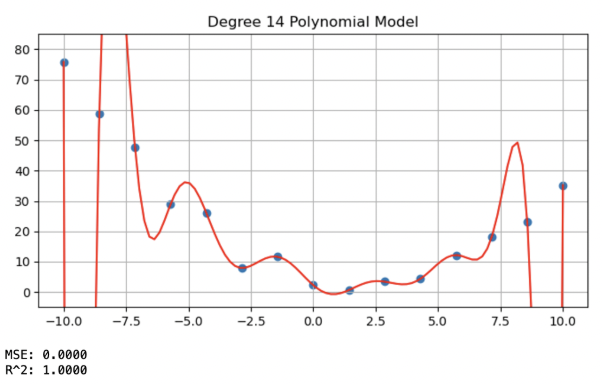

The answer to this question brings us to the “holy grail” of machine learning: generalization!

### Generalization
Generalization is the ability of a machine learning model to perform well on new, unseen data by capturing the underlying patterns from the training data. It ensures that the model's predictions are reliable when applied to data from the same domain, making it critical for real-world applications.

Generalization is at the heart of building robust ML models, whether used to explore meaningful relationships in the data or to transfer insights from past data to predict future outcomes. A model that fails to generalize is either **underfitting*** (failing to learn important patterns) or **overfitting** (capturing noise rather than real signals). The key to improving generalization is to minimize reducible errors while acknowledging that irreducible errors—those inherent in the data—cannot be eliminated.

This is the most important goal for all machine learning models, whether supervised or unsupervised: ensuring the model can generalize well to new, unseen data.

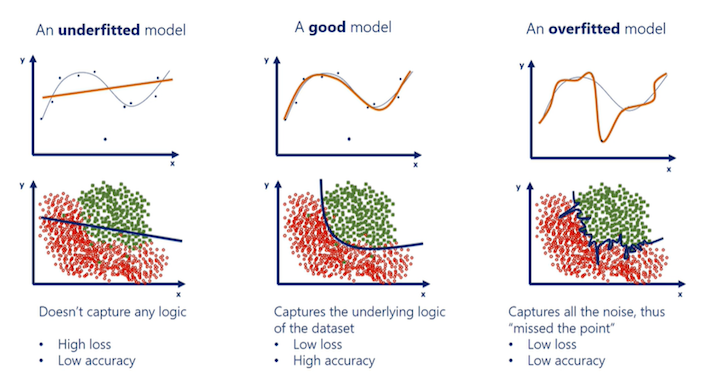

How would the three polynomial regression models in this figure react to a new data point that follows the same basic pattern (clearly a cubic relationship with some irreducible noise, including an outlier point)? The underfit and overfit models will tend to predict poorly, and new points will have higher MSEs; typically, the overfit model tries to model every point, including the obvious noisy outlier:

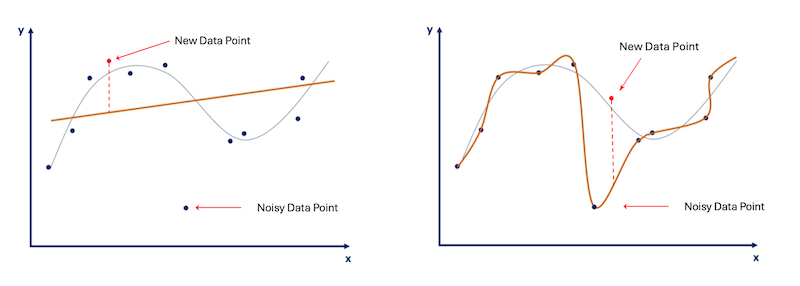

The balanced model has a low MSE on new data points near the actual curve; it does not do well on the outlier, but that’s the idea–no model is expected to deal with irreducible errors!

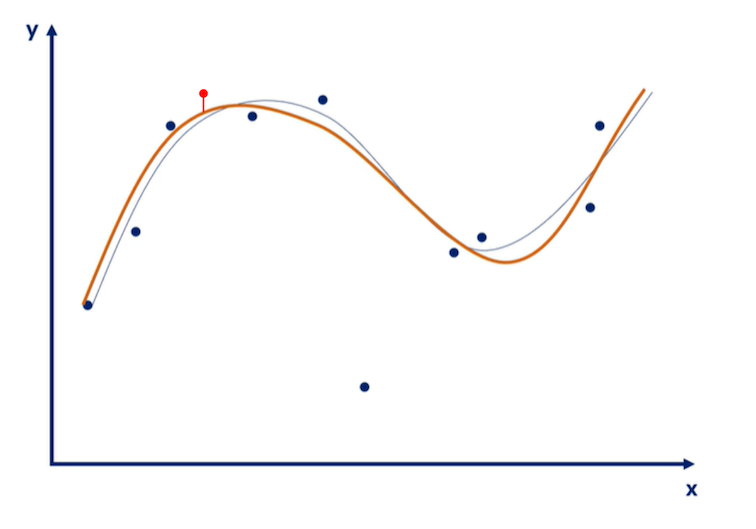

# 3.2 Lesson: The Bias-Variance Tradeoff
Now that we’ve explored generalization—the ability of a model to perform well on new, unseen data—it’s time to delve into what influences a model’s performance. One of the key challenges in machine learning is managing the **bias-variance tradeoff**, which reflects the tension between underfitting and overfitting. Models with high **bias** are too simplistic, missing important patterns, while models with high variance are too sensitive to the training data, capturing noise along with the signal. The bias-variance tradeoff is not just a conceptual idea; it provides a statistical framework that allows us to quantify these errors—enabling us to precisely measure and minimize the reducible error that impacts a model’s ability to generalize.

When building machine learning models, our goal is to minimize the MSE on unseen data, often simply referred to as the test set. The expected test MSE can be decomposed into three components:

$$ E (Y_0 - \hat{f}(x_0))^2 \quad = \quad Var(\hat{f}(x_0)) + [Bias (\hat{f}(x_0))]^2 + Var(\epsilon)$$

This equation shows that the test MSE is influenced by:
1. Variance of the model’s predictions,
2. Squared bias of the model’s predictions, and
3. Irreducible error $Var(\epsilon)$, representing errors that cannot be reduced by the model.

### Variance

Variance refers to the extent to which a model’s predictions would change if we trained it on different datasets. High-variance models are overly sensitive to small changes in the training data, leading to overfitting. Flexible models (like high-degree polynomials) often have high variance because they capture even the noise in the data.

### Bias

Bias refers to the error introduced by approximating a complex real-world problem with a simpler model. A high-bias model might underfit the data by missing important relationships. For example, using linear regression to model a highly non-linear relationship will lead to high bias. This can cause the model to consistently produce inaccurate predictions, regardless of the training set.

### The Tradeoff

The bias-variance tradeoff reflects the challenge of finding a balance between underfitting and overfitting. Bias decreases as the model becomes more flexible, but variance increases. As the model becomes more flexible, it fits the training data better, but at the cost of becoming overly sensitive to the specifics of the data.

- At first, increasing model flexibility reduces bias more than it increases variance, leading to a decrease in the test MSE
- However, at some point, increasing flexibility will cause the variance to rise sharply, causing the test MSE to increase even though the bias is still decreasing

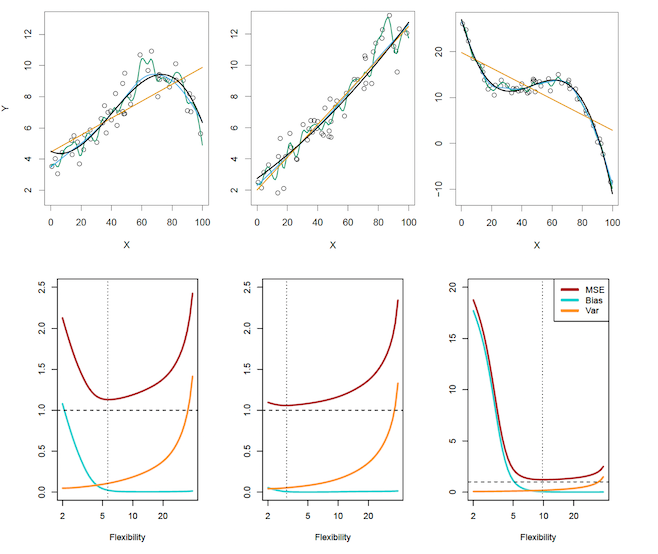

The **blue curve** represents bias, the **orange curve** represents variance, and the **red curve** represents the overall test MSE. Initially, as flexibility increases, test MSE drops as bias decreases. Eventually, the curve rises again as the increasing variance dominates.

### Conclusions

To build an effective machine learning model, it’s critical to balance bias and variance. 

- **Low-bias, high-variance models** tend to overfit the training data, while **high-bias, low-variance models** underfit
- The goal is to find a **balance** where both bias and variance are minimized enough to achieve the lowest possible test MSE
- Flexible methods may perform well when the true underlying relationship is complex, but they can fail when the relationship is simpler

### Variance and Bias in Training Sets
The notebook from this video below can be found in this GitHub repository. Access the notebook and follow along with the video. Pause the video if you need to while you complete the workbook.

### Creating a Synthetic Dataset with Noise 
In orter to analyze this rigorously, we assume we have a perfect function $f$ generating our data and a source of errors ("noise") $\epsilon$ such that the mean $\mathbb{E}(\epsilon)$ is 0. THerefore there is a potentially infinite dataset.

$$ \mathbb{D} \quad = \quad { (x, y) | y = f(x + \epsilon)}, $$